<a href="https://colab.research.google.com/github/navinkumar357/Deep-learning-with-TensorFlow-Keras/blob/master/doggos_vs_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
from zipfile import ZipFile
file_name = "/content/drive/My Drive/Colab Notebooks/kagglecatsanddogs_3367a.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("done")

done


In [3]:
from zipfile import ZipFile
file_name = "/content/drive/My Drive/Colab Notebooks/Test.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("done")

done


In [4]:
import tensorflow as tf
tf.__version__

'2.3.0'

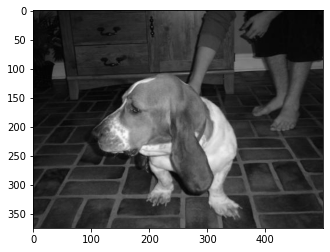

(375, 500)


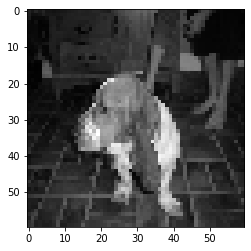

100%|██████████| 12501/12501 [00:14<00:00, 886.49it/s]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle
from tqdm import tqdm

DATADIR = '/content/PetImages'
CATEGORIES = ['Dog', 'Cat']

for category in CATEGORIES:                 # create path to dogs and cats
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break
print(img_array.shape)

IMG_SIZE = 60
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

training_data = []

def create_training_data():
    for category in CATEGORIES:

        path = os.path.join(DATADIR, category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):      # iterate over each image per dogs and cats and tqdm gives a progress bar
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

random.shuffle(training_data)



In [7]:
random.shuffle(training_data)
for sample in training_data [:10]:
    print(sample[1], end=" ")


0 1 0 1 0 0 1 0 0 1 

In [8]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

Pickle is used to temporarily store the numpy arrays of X and y.

*   It is dumped when writing and loaded when reading back.




In [9]:
pickle_out = open('X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

pickle_in = open('X.pickle', 'rb')
X = pickle.load(pickle_in)
pickle_in = open('y.pickle', 'rb')
y = pickle.load(pickle_in)
X = X/255.0

model = Sequential()
model.add(Conv2D(128, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(X, y, batch_size=32, epochs=11, validation_split=0.2)

Epoch 1/11
624/624 [==============================] - 16s 25ms/step - loss: 0.6651 - accuracy: 0.5849 - val_loss: 0.6240 - val_accuracy: 0.6495
Epoch 2/11
624/624 [==============================] - 15s 24ms/step - loss: 0.5602 - accuracy: 0.7186 - val_loss: 0.4774 - val_accuracy: 0.7727
Epoch 3/11
624/624 [==============================] - 15s 25ms/step - loss: 0.4743 - accuracy: 0.7757 - val_loss: 0.5162 - val_accuracy: 0.7429
Epoch 4/11
624/624 [==============================] - 15s 24ms/step - loss: 0.4327 - accuracy: 0.7995 - val_loss: 0.4386 - val_accuracy: 0.7962
Epoch 5/11
624/624 [==============================] - 15s 24ms/step - loss: 0.4017 - accuracy: 0.8190 - val_loss: 0.4765 - val_accuracy: 0.7836
Epoch 6/11
624/624 [==============================] - 15s 24ms/step - loss: 0.3695 - accuracy: 0.8344 - val_loss: 0.4438 - val_accuracy: 0.7866
Epoch 7/11
624/624 [==============================] - 15s 24ms/step - loss: 0.3452 - accuracy: 0.8447 - val_loss: 0.4120 - val_accuracy: